In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import ODESolve as ODE
import ODESolve_slow as ODEslow
import derivatives as der

In [2]:
E0= 1     #two different neutrino modes now
E1= 2
dm2= 2
th= .5*np.arcsin(.8)
N=2       #number of modes



ym0= np.zeros((N,4))   #initial conditions for each energy
ym0[0,:]=[1,0,0,1]
ym0[1,:]=[1,0,0,1]

p= np.zeros(4)
p[0]=E0
p[1]=E1
p[-1]=dm2
p[-2]=th
print(ym0)

[[1. 0. 0. 1.]
 [1. 0. 0. 1.]]


In [3]:
def matrix_maker(y):
    length= len(y)
    matrix = np.zeros((length//4,4))
    
    for i in range(matrix.shape[0]):
        for j in range(4):
            matrix[i,j]= y[4*i+j]
    return matrix


def array_maker(M):
    length= M.shape[0]
    array = np.zeros(length*4)
    
    for i in range(M.shape[0]):
        for j in range(4):
            array[4*i+j] = M[i,j]
            
    return array  
                 

In [4]:
y0= array_maker(ym0)
print(y0)


[1. 0. 0. 1. 1. 0. 0. 1.]


In [5]:
der.vacuum(ym0[0,:], p[0], p[-1], p[-2])
der.vacuum(ym0[1,:], p[0], p[-1], p[-2])

array([ 0. ,  0. , -0.8,  0. ])

In [6]:
 #function that will go in derivatives file

def f(x,y,p):     
    ym= matrix_maker(y)
    
    derm= np.zeros((2,4))
    derm[0,:]= der.vacuum(ym[0,:], p[0], p[-1], p[-2])
    derm[1,:]= der.vacuum(ym[1,:], p[1], p[-1], p[-2])
    
    return array_maker(derm)

In [7]:
t0= 0
dt0=  0.01/.8
N_step = 100               #number of runge kutta steps 
dN = 1
t_final = 10 

#print(matrix_maker(f(t0, y0, p)))
#print(y0)
print(p)
#print(dt0)

[1.         2.         0.46364761 2.        ]


In [16]:
N=2
length= N*4
print(y0)
t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

print(len(y))
print(y0)
#y is the output 



[1. 0. 0. 1. 1. 0. 0. 1.]
101
[1. 0. 0. 1. 1. 0. 0. 1.]


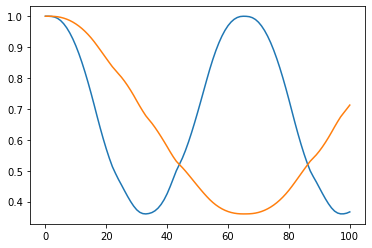

In [9]:
y1_check = .5*y[:,0]*(1+y[:,3])
y2_check = .5*y[:,4]*(1+y[:,7])

plt.figure()
plt.plot(y1_check)
plt.plot(y2_check)
plt.show()

In [10]:
print(y[:,0])   #at t=0, all steps are at 100% probability
print(y[0,:])   

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
[1. 0. 0. 1. 1. 0. 0. 1.]


In [11]:
M= y.shape[0]     #a 3d matrix, a matrix M long, where each spot is a 2x4 matrix 
matrix= np.zeros((M, 2, 4))


#takes the Mx8 output of y from ODEsolve and transforms it into Mx2x4 matrix

for i in range(M):      #each index in the matrix array is filled with the 2x4 matrix made from the y array
    matrix[i,:,:]= matrix_maker(y[i,:])
    


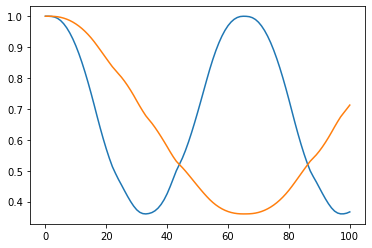

In [12]:
check1= .5*matrix[:, 0, 0]*(1+matrix[:,0, 3])
check2= .5*matrix[:, 1, 0]*(1+matrix[:,1, 3])

plt.figure()
plt.plot(check1)
plt.plot(check2)
plt.show()

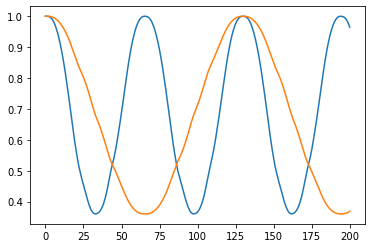

In [13]:
#checking if with twice the ammount of steps and twice the amount of time

t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, 2*N_step, dN, 2*t_final)

M= y.shape[0]
matrix= np.zeros((M, 2, 4))

for i in range(M):
    matrix[i,:,:]= matrix_maker(y[i,:])
    


check1= .5*matrix[:, 0, 0]*(1+matrix[:,0, 3])
check2= .5*matrix[:, 1, 0]*(1+matrix[:,1, 3])

plt.figure()
plt.plot(check1)
plt.plot(check2)
plt.show()

In [14]:
#everything kinda condensed into one cell

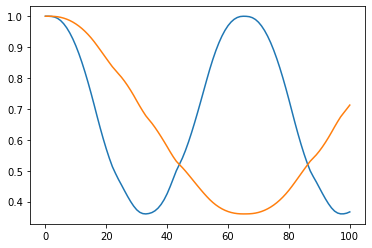

In [15]:
N=2                         #number of modes
E0= 1    
E1= 2
dm2= 2
th= .5*np.arcsin(.8)
t0= 0
dt0=  0.01/.8
N_step = 100              
dN = 1
t_final = 10 



ym0= np.zeros((N,4))        #initial conditions for each energy, in matrix form
ym0[0,:]=[1,0,0,1]
ym0[1,:]=[1,0,0,1]


p= np.zeros(4)             #parameters 
p[0]=E0
p[1]=E1
p[-1]=dm2
p[-2]=th



def matrix_maker(y):                         #matrix and array making functions
    length= len(y)
    matrix = np.zeros((length//4,4))
    
    for i in range(matrix.shape[0]):
        for j in range(4):
            matrix[i,j]= y[4*i+j]
    return matrix


def array_maker(M):
    length= M.shape[0]
    array = np.zeros(length*4)
    
    for i in range(M.shape[0]):
        for j in range(4):
            array[4*i+j] = M[i,j]
            
    return array 


y0= array_maker(ym0)                        #turns our initial conditions matrix into an intitial conditions array


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)         #solves ODEs



y1_check = .5*y[:,0]*(1+y[:,3])
y2_check = .5*y[:,4]*(1+y[:,7])

plt.figure()
plt.plot(y1_check)
plt.plot(y2_check)
plt.show()


